<h1 style="color:#2A5DB0;">Phase 4 – Classification </h1>

In [28]:
# Look at all columns to find category/subcategory labels
df.columns

Index(['recipe_title', 'category', 'subcategory', 'description', 'ingredients',
       'directions', 'num_ingredients', 'num_steps', 'ingredients_list',
       'clean_ingredients_list', 'ingredients_text'],
      dtype='object')

In [30]:
# peek at category / subcategory columns
df[["category", "subcategory"]].head()

,category,subcategory
0,Air Fryer Recipes,Air Fryer Recipes
1,Air Fryer Recipes,Air Fryer Recipes
2,Air Fryer Recipes,Air Fryer Recipes
3,Air Fryer Recipes,Air Fryer Recipes
4,Air Fryer Recipes,Air Fryer Recipes


In [32]:
print("Unique categories:", df["category"].nunique())
print("Unique subcategories:", df["subcategory"].nunique())

print("\nTop 20 category counts:")
print(df["category"].value_counts().head(20))

print("\nTop 20 subcategory counts:")
print(df["subcategory"].value_counts().head(20))

Unique categories: 267
Unique subcategories: 1032

Top 20 category counts:
category
Main Dishes              3387
Healthy Recipes          2237
Appetizers And Snacks    2084
Cakes                    1954
Cookies                  1849
Beef Recipes             1400
Breads                   1352
Desserts                 1288
Breakfast And Brunch     1223
Pork                     1205
Mexican                  1069
Christmas                1020
Vegetarian                968
Pies                      954
Christmas Cookies         945
Casseroles                941
Dinner                    894
Easter                    885
Cocktails                 775
Italian                   775
Name: count, dtype: int64

Top 20 subcategory counts:
subcategory
Meatloaf                     320
Lasagna                      248
Pizza                        233
Cinnamon Rolls               229
Pork Chops                   193
Oatmeal Cookies              192
Cookie Icing And Frosting    192
Vegetarian Main Dis

In [34]:
target_col = "category" 
y = df[target_col]

y.head()

0    Air Fryer Recipes
1    Air Fryer Recipes
2    Air Fryer Recipes
3    Air Fryer Recipes
4    Air Fryer Recipes
Name: category, dtype: object

In [36]:
X = X_tfidf  # our feature matrix from ingredients

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (62126, 67698)
y shape: (62126,)


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y  # keeps same label proportions
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((49700, 67698), (12426, 67698), (49700,), (12426,))

In [42]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    max_iter=1000,
    n_jobs=-1
)


log_reg.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(
    n_neighbors=5,
    weights="distance",
    metric="cosine"      
)

knn.fit(X_train, y_train)


,n_neighbors,5
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'cosine'
,metric_params,None
,n_jobs,None


In [48]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Model"):
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Accuracies
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print(f"=== {model_name} ===")
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy : {test_acc:.4f}\n")

    # Classification report
    print("Classification Report (Test):")
    print(classification_report(y_test, y_test_pred))

    # Confusion matrix
    labels_sorted = sorted(y.unique())
    cm = confusion_matrix(y_test, y_test_pred, labels=labels_sorted)

    plt.figure(figsize=(10, 8))
    sns.heatmap(
        cm,
        annot=False,
        fmt="d",
        xticklabels=labels_sorted,
        yticklabels=labels_sorted
    )
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.tight_layout()
    plt.show()


=== Logistic Regression ===
Train Accuracy: 0.3883
Test Accuracy : 0.2570

Classification Report (Test):
                                 precision    recall  f1-score   support

              Air Fryer Recipes       0.11      0.04      0.06        49
     Allrecipes Allstar Recipes       0.17      0.05      0.08       128
               Angel Food Cakes       0.00      0.00      0.00         3
                      Antipasti       0.00      0.00      0.00         7
          Appetizers And Snacks       0.26      0.55      0.36       417
                      Apple Pie       0.00      0.00      0.00        13
                     Applesauce       0.00      0.00      0.00         6
                 Artichoke Dips       0.40      0.40      0.40        10
                         Bagels       0.00      0.00      0.00         4
                    Baked Beans       0.17      0.08      0.11        12
                  Banana Breads       0.28      0.35      0.31        52
                  

C:\Users\Ozlem\Documents\QC\Labs\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Ozlem\Documents\QC\Labs\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Ozlem\Documents\QC\Labs\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


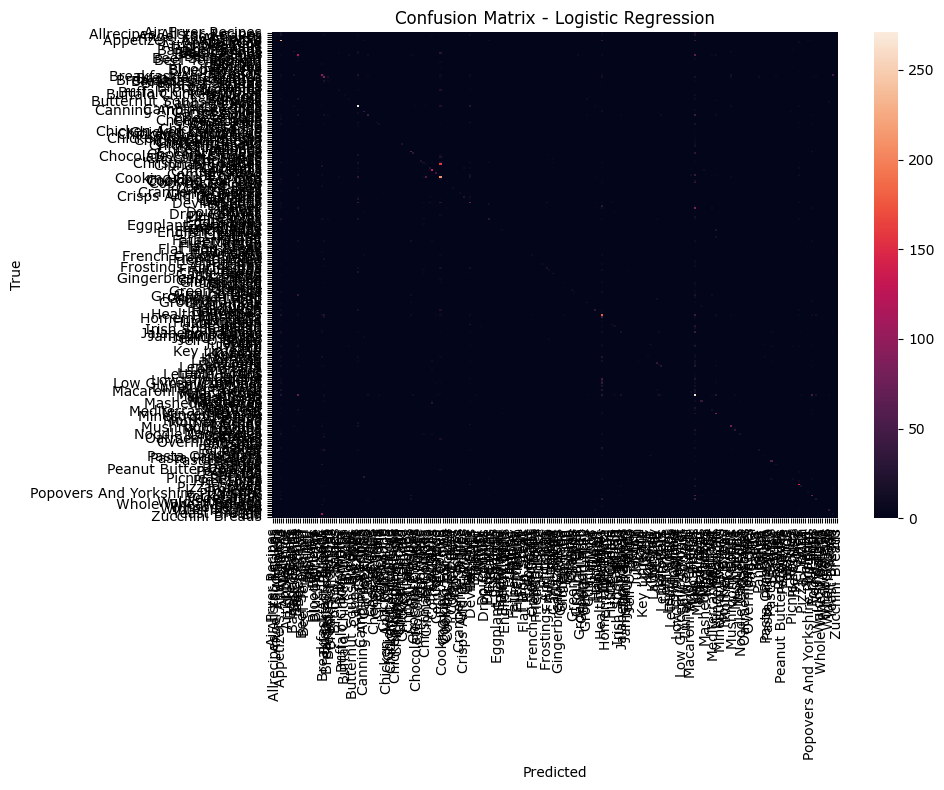

=== KNN ===
Train Accuracy: 0.5734
Test Accuracy : 0.1839

Classification Report (Test):
                                 precision    recall  f1-score   support

              Air Fryer Recipes       0.17      0.22      0.19        49
     Allrecipes Allstar Recipes       0.07      0.11      0.09       128
               Angel Food Cakes       0.00      0.00      0.00         3
                      Antipasti       0.09      0.14      0.11         7
          Appetizers And Snacks       0.26      0.33      0.29       417
                      Apple Pie       0.00      0.00      0.00        13
                     Applesauce       0.00      0.00      0.00         6
                 Artichoke Dips       0.27      0.30      0.29        10
                         Bagels       0.00      0.00      0.00         4
                    Baked Beans       0.04      0.08      0.06        12
                  Banana Breads       0.14      0.15      0.14        52
                    Bar Cookies   

C:\Users\Ozlem\Documents\QC\Labs\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Ozlem\Documents\QC\Labs\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Ozlem\Documents\QC\Labs\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


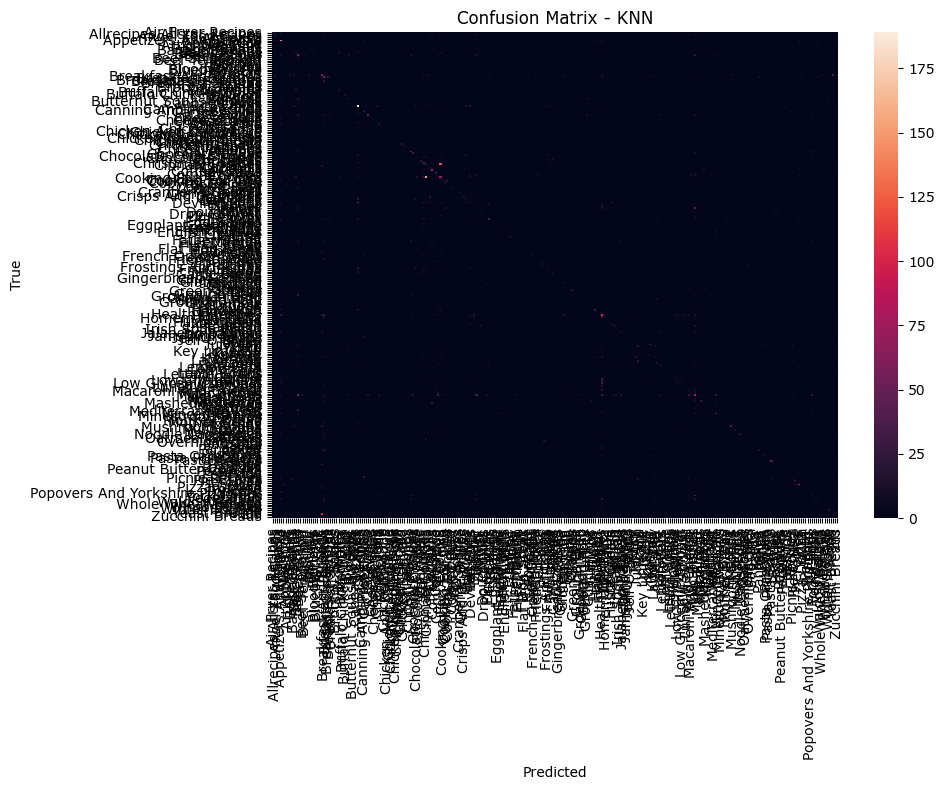

In [50]:
evaluate_model(log_reg, X_train, y_train, X_test, y_test, "Logistic Regression")
evaluate_model(knn, X_train, y_train, X_test, y_test, "KNN")


Confusion Matrix Analysis 

The confusion matrix for Logistic Regression shows a highly sparse structure due to the large number of recipe categories (200+). Most categories contain very few samples, which results in entire rows and columns with no correct predictions. This is expected in extreme class-imbalanced multi-class problems.

The diagonal contains only a small number of bright cells, indicating the categories the model can classify reliably—mostly high-frequency classes such as Cakes, Pies, and Appetizers and Snacks.

For rare categories (e.g., those with fewer than 10 examples), the model predicts almost none of them correctly, which is reflected in the dark rows of the matrix. This confirms that class imbalance is the main challenge in the classification task.

<h1 style="color:#2A5DB0;">Model Comparision</h1>


<h2>Logistic Regression</h2>
Train accuracy: 0.3883

Test accuracy: 0.2570

Weighted F1: 0.21


<h2>KNN</h2>
Train accuracy: 0.5734

Test accuracy: 0.1839

Weighted F1: 0.17

So:
KNN has higher train accuracy but lower test accuracy => more overfitting.
Logistic Regression has better test accuracy and better weighted F1.
Therefore our best classifier = Logistic Regression

<h1 style="color:#2A5DB0;">Phase 4 – Classification Results</h1>

<h2>Methodology</h2>
<p>
We modeled recipe category prediction as a <b>multi-class classification problem</b> using only ingredient text.
TF–IDF vectorization was used to convert the cleaned ingredient strings into high-dimensional vectors.
The <code>category</code> column contains over <b>200 classes</b>, many with very few samples, creating strong class imbalance.
</p>

<hr>

<h2>Models Evaluated</h2>
<ul>
  <li><b>Logistic Regression</b> (multinomial, L2 regularization, max_iter=1000)</li>
  <li><b>KNN</b> (k=5, distance weighting, cosine distance)</li>
</ul>

<hr>

<h2>Results</h2>
<p><b>Logistic Regression:</b> 38.8% train accuracy, 25.7% test accuracy, weighted F1 ≈ 0.21.</p>
<p><b>KNN:</b> 57.3% train accuracy, 18.4% test accuracy, weighted F1 ≈ 0.17.</p>

<p>
The confusion matrix for Logistic Regression is sparse due to the large number of categories.
Frequent categories like <i>Cakes</i> and <i>Pies</i> show stronger diagonal signals.
Rare categories (fewer than 10 examples) show little to no correct predictions.
</p>

<hr>

<h2>Final Model Selection</h2>
<p>
We selected <b>Logistic Regression</b> as the final classifier because it generalizes better than KNN and achieves
higher test accuracy and F1-scores.
</p>
